<a href="https://colab.research.google.com/github/cakshay2013/Convex-Optimization-Problems-and-Solutions/blob/main/Road_Gradient_Problem_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal total cost:
 9451.179224746204


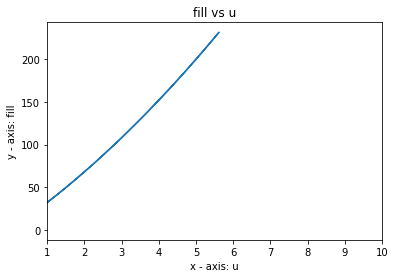

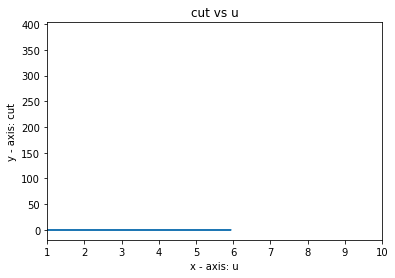

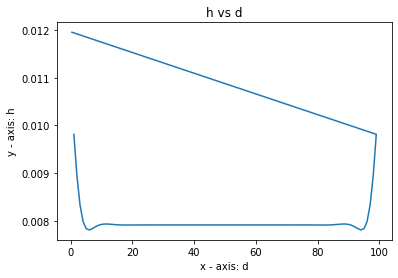

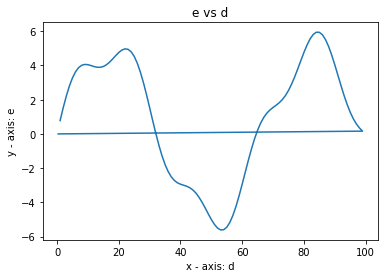

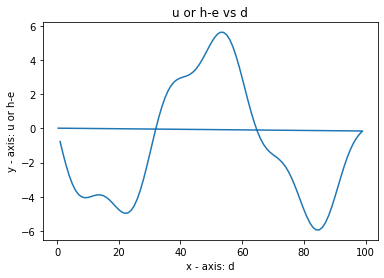

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
 
n = 100
h = cp.Variable((n))
e = np.empty((n))
 
for i in range (1, n):
  e[i-1] = 5*np.sin((i*3*np.pi)/n) + np.sin((i*10*np.pi)/n)
 
#u = h - e
 
#Objective
fill = 2*cp.square(cp.maximum(h-e,0)) + 30*cp.maximum(h-e,0)
cut = 12*cp.square(cp.maximum(h-e,0)) + cp.maximum(h-e,0)
C = fill + cut
objective = cp.Minimize(cp.sum(C).value)
 
#Constraints
constraints = [cp.max(cp.abs(h[i+1] - h[i])) <=0.08 for i in range(0, n-2)]
constraints += [cp.max(cp.abs(h[i+2] - 2*h[i+1] + h[i])) <=0.025 for i in range(0, n-3)]
constraints += [cp.max(cp.abs(h[i+3] - 3*h[i+2] + 3*h[i+1] - h[i])) <=0.005 for i in range(0, n-4)]
constraints += [h>=0]
 
prob = cp.Problem(objective, constraints)
prob.solve()
 
#Answers
print("Optimal total cost:\n", cp.sum(C).value)
#print("h:", h.value)
 
d = np.empty((n))
d[0] = 1.0
for i in range(0, n-2):
  d[i+1] = d[i] + 1.0
 
plt.plot((h-e).value, fill.value)
plt.xlim(1, 10.0)
plt.xlabel('x - axis: u')
plt.ylabel('y - axis: fill')
plt.title('fill vs u')
plt.show()
 
plt.plot((e-h).value, cut.value)
plt.xlim(1, 10.0)
plt.xlabel('x - axis: u')
plt.ylabel('y - axis: cut')
plt.title('cut vs u')
plt.show()
 
plt.plot(d, h.value)
plt.xlabel('x - axis: d')
plt.ylabel('y - axis: h')
plt.title('h vs d')
plt.show()
 
plt.plot(d, e)
plt.xlabel('x - axis: d')
plt.ylabel('y - axis: e')
plt.title('e vs d')
plt.show()
 
plt.plot(d, (h-e).value)
plt.xlabel('x - axis: d')
plt.ylabel('y - axis: u or h-e')
plt.title('u or h-e vs d')
plt.show()